Nome: Diogo Melo Delgado Azevedo

Email: dmda@cesar.school

Dataset: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets/data/code


In [615]:
# http://pytorch.org/
from os.path import exists

import torch


In [616]:
%matplotlib inline
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from torch.nn import functional as F

from torch.autograd import Variable
import torch.nn as nn

# Dataset

In [617]:
import kagglehub
dataset_id = "muratkokludataset/date-fruit-datasets"
download_path = kagglehub.dataset_download(dataset_id)
path = f"{download_path}/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx"

df = pd.read_excel(path)

Using Colab cache for faster access to the 'date-fruit-datasets' dataset.


In [618]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [620]:
X = df.drop('Class', axis=1)
y = df['Class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("Data preprocessing complete. Shapes of tensors:")
print(f"X_train_tensor: {X_train_tensor.shape}")
print(f"y_train_tensor: {y_train_tensor.shape}")
print(f"X_test_tensor: {X_test_tensor.shape}")
print(f"y_test_tensor: {y_test_tensor.shape}")

Data preprocessing complete. Shapes of tensors:
X_train_tensor: torch.Size([718, 34])
y_train_tensor: torch.Size([718])
X_test_tensor: torch.Size([180, 34])
y_test_tensor: torch.Size([180])


# Rede e Treinamento

In [621]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2) # Adicionando Dropout com p=0.2
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2) # Adicionando Dropout com p=0.2
        self.fc3 = nn.Linear(128, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.2) # Dropout para a nova camada
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out) # Aplicando Dropout
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out) # Aplicando Dropout
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout3(out) # Aplicando Dropout
        out = self.fc4(out)

        return out

input_size = X_train_tensor.shape[1]
num_classes = len(label_encoder.classes_)

model = NeuralNet(input_size, num_classes)

print(f"Neural Network Model created with input size: {input_size} and output classes: {num_classes}")
print(model)

Neural Network Model created with input size: 34 and output classes: 7
NeuralNet(
  (fc1): Linear(in_features=34, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=128, out_features=7, bias=True)
)


In [622]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

num_epochs = 170
training_losses = []
training_accuracies = []
test_losses = []

# Move data to the device
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

for epoch in range(num_epochs):
    model.train()


    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    _, predicted = torch.max(outputs.data, 1)
    total = y_train_tensor.size(0)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / total

    training_losses.append(loss.item())
    training_accuracies.append(accuracy)

    # Avaliando as perdas de teste por época
    model.eval()
    with torch.no_grad():
        test_outputs_epoch = model(X_test_tensor)
        test_loss_epoch = criterion(test_outputs_epoch, y_test_tensor).item()
        test_losses.append(test_loss_epoch)
    model.train() # Volta o modelo para modo de treinamento

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}, Test Loss: {test_loss_epoch:.4f}')

print("Training complete.")

Epoch [10/170], Training Loss: 1.7310, Training Accuracy: 0.6086, Test Loss: 1.6854
Epoch [20/170], Training Loss: 1.3320, Training Accuracy: 0.6253, Test Loss: 1.2163
Epoch [30/170], Training Loss: 0.9569, Training Accuracy: 0.6393, Test Loss: 0.8401
Epoch [40/170], Training Loss: 0.6960, Training Accuracy: 0.7423, Test Loss: 0.6316
Epoch [50/170], Training Loss: 0.5377, Training Accuracy: 0.8078, Test Loss: 0.4783
Epoch [60/170], Training Loss: 0.4464, Training Accuracy: 0.8245, Test Loss: 0.3813
Epoch [70/170], Training Loss: 0.3872, Training Accuracy: 0.8426, Test Loss: 0.3173
Epoch [80/170], Training Loss: 0.3278, Training Accuracy: 0.8788, Test Loss: 0.2766
Epoch [90/170], Training Loss: 0.3105, Training Accuracy: 0.8914, Test Loss: 0.2467
Epoch [100/170], Training Loss: 0.2552, Training Accuracy: 0.9081, Test Loss: 0.2190
Epoch [110/170], Training Loss: 0.2443, Training Accuracy: 0.9067, Test Loss: 0.2000
Epoch [120/170], Training Loss: 0.2343, Training Accuracy: 0.9095, Test Lo

Final Test Loss: 0.1550, Final Test Accuracy: 0.9444

Confusion Matrix:
[[11  0  0  1  0  0  0]
 [ 0 17  1  0  0  0  2]
 [ 0  1 49  0  0  0  0]
 [ 2  0  0  8  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0 18]]


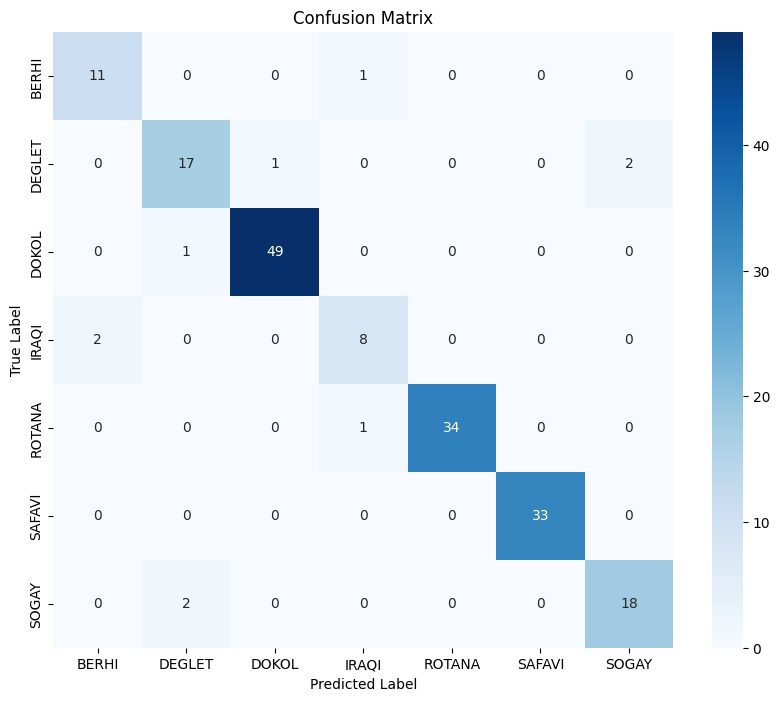

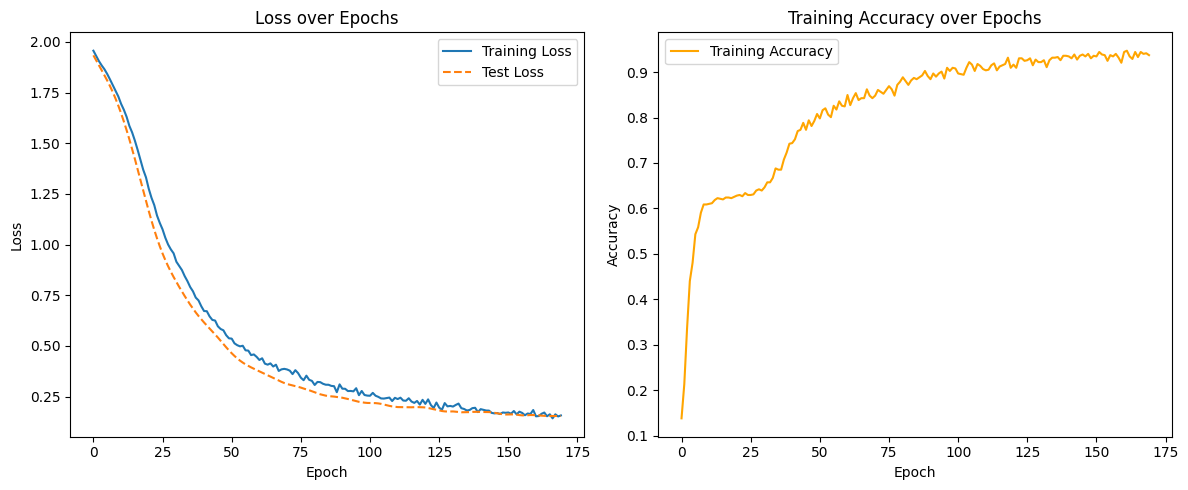

In [623]:
from sklearn.metrics import confusion_matrix


model.eval()

with torch.no_grad():
    # . Fazer previsões no X_test_tensor
    test_outputs = model(X_test_tensor)

    #  Calcular a perda do conjunto de teste
    final_test_loss = criterion(test_outputs, y_test_tensor).item()

    #  Converter as previsões do modelo para rótulos previstos
    _, predicted_labels = torch.max(test_outputs.data, 1)

    #  Calcular a acurácia do conjunto de teste
    total_test = y_test_tensor.size(0)
    correct_test = (predicted_labels == y_test_tensor).sum().item()
    final_test_accuracy = correct_test / total_test

# Imprimir a perda e a acurácia do conjunto de teste
print(f'Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.4f}')

# Converter os rótulos verdadeiros e os rótulos previstos para arrays NumPy
y_true_np = y_test_tensor.cpu().numpy()
y_pred_np = predicted_labels.cpu().numpy()

# Gere e imprima a matriz de confusão
cm = confusion_matrix(y_true_np, y_pred_np)
print("\nConfusion Matrix:")
print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotar a perda de treinamento e teste ao longo das épocas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss', linestyle='--') # Adicionando Test Loss
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotar a acurácia de treinamento ao longo das épocas
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy', color='orange')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Exiba ambos os plots
plt.tight_layout()
plt.show()

# Conclusões

O dataset utilizado possuia 898 imagens de tãmaras, sendo divididas em 7 classes, contendo 34 colunas no total, sendo necessário criarclassifica-las de acordo com a categoria correta. Não foi necessário fazer nenhuma limpeza dos dados do dataset. Após a divisão de treino e teste e a normalização, os valores dos conjustos de treino e teste foram convertidos para tensores do pytorch, ideia que foi inspirada em alguns dos códigos para esse dataset que foram postados no prorpio Kaggle. Já a estrutura de treinamento foi baseada no notebook  4.6-MNIST_neuralnet.ipynb.

Durante o treinamento do modelo, foi encontrado overfitting em diversos momentos, em certos momentos mais profundo, e em outros mais leve. Resolver o overfitting e alcanças os melhores valores possíveis para perda e acurácia foi o maior desafio durante o treinamento, pois normalmente durante as tentativas, ou o modelo ficava muito especifico, ou as perdas sofriam um aumento um pouco alto. Além de mudanças na complexidade da rede, alterando a quantidade de camadas e neurônios, e testando learning rates diferentes, foram adicionados Dropouts após cada camda ReLu, com peso de 0,2 e a regularização L2, com weight decay de 1e-5, para ajudar na generalização do modelo. A utilização desses dois métodos possiblitou chegar em valores melhores para a perda e a acurácia, e diminuir o overfitting. Com os paramêtros utlizados nesse notebook, obteve-se valores da perda de treino e de teste na em torno de 0,15, com uma pequena diferença entre eles, e acurácia acima de 90%, chegando próxima de 95%. Com uma melhor avaliação dos parâmetros utilizados, bem como da complexidade da rede, talvez seja possível chegar a resultados mais desejáveis com esse dataset.